In [1]:
import firebase_admin
from firebase_admin import credentials, firestore

In [2]:
# Initialize the Firebase app with your credentials
cred = credentials.Certificate('./serviceAccountKey.json')
firebase_admin.initialize_app(cred)

# Initialize Firestore DB
db = firestore.client()

In [3]:
# Reference to your Firestore collection
collection_ref = db.collection('trainML')

# Fetch all documents in the collection
docs = collection_ref.stream()

# Extract data into a list of dictionaries
data = []
for doc in docs:
    data.append(doc.to_dict())


In [4]:
import pandas as pd

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


           ID  Gender  Total_correct_answers  slow Age  fast  medium  \
0   212016364    male                     34    12  23    20       2   
1   213346877    male                     31     5  21    22       4   
2   213305949    male                     11     4  21     6       1   
3   213075831    male                     13     5  21     4       4   
4   212189120  female                     31     3  23    23       5   
5   212262026    male                     34     6  22    20       8   
6   206700668    male                     15     6  26     6       3   
7   323994715    male                     32     8  22    15       9   
8   212187256    male                     29     4  24    22       3   
9   211571849    male                     15     2  23     7       6   
10  212958995    male                     32     4  22    21       7   
11  213591936    male                     12     2  20     6       4   
12  326313277  female                     35     5  20    21    

In [5]:
df

,ID,Gender,Total_correct_answers,slow,Age,fast,medium,Name,grade,Total_wrong_answers
0,212016364,male,34,12,23,20,2,mohammed abu saleh,653,4
1,213346877,male,31,5,21,22,4,nooran,710,5
2,213305949,male,11,4,21,6,1,mohamed,598,3
3,213075831,male,13,5,21,4,4,basel,520,2
4,212189120,female,31,3,23,23,5,sara,630,4
5,212262026,male,34,6,22,20,8,ahmad,627,4
6,206700668,male,15,6,26,6,3,yazan,535,1
7,323994715,male,32,8,22,15,9,melad,555,7
8,212187256,male,29,4,24,22,3,mohammed khatib,617,6
9,211571849,male,15,2,23,7,6,ronin,660,1


In [7]:
# male = 1, female = 0
def genderToBinary(type):
    if type == 'male':
        return 1
    else:
        return 0
    
df['Gender'] = df['Gender'].apply(lambda i: genderToBinary(i))

In [14]:
# grade between 400 to 550 = 0
# grade between 550 to 650 = 1
# grade between 650 to 750 = 2
# grade between 750 to 800 = 3
def gradeToBinary(grade):
    num = int(grade)
    if(num >= 400 and num < 550):
        return 0
    elif(num >= 550 and num < 650):
        return 1
    elif(num >= 650 and num < 750):
        return 2
    else:
        return 3
    
df['grade'] = df['grade'].apply(lambda i: gradeToBinary(i))

In [35]:
def convertAge(age):
    return int(age)

df['Age'] = df['Age'].apply(lambda i: convertAge(i))

In [36]:
df

,Gender,Total_correct_answers,slow,Age,fast,medium,grade,Total_wrong_answers
0,1,34,12,23,20,2,2,4
1,1,31,5,21,22,4,2,5
2,1,11,4,21,6,1,1,3
3,1,13,5,21,4,4,0,2
4,0,31,3,23,23,5,1,4
5,1,34,6,22,20,8,1,4
6,1,15,6,26,6,3,0,1
7,1,32,8,22,15,9,1,7
8,1,29,4,24,22,3,1,6
9,1,15,2,23,7,6,2,1


In [37]:
df.drop(['ID','Name'],axis=1,inplace=True)

KeyError: "['ID', 'Name'] not found in axis"

In [43]:
df

,Gender,Total_correct_answers,slow,Age,fast,medium,grade,Total_wrong_answers
0,1,34,12,23,20,2,2,4
1,1,31,5,21,22,4,2,5
2,1,11,4,21,6,1,1,3
3,1,13,5,21,4,4,0,2
4,0,31,3,23,23,5,1,4
5,1,34,6,22,20,8,1,4
6,1,15,6,26,6,3,0,1
7,1,32,8,22,15,9,1,7
8,1,29,4,24,22,3,1,6
9,1,15,2,23,7,6,2,1


<Axes: >

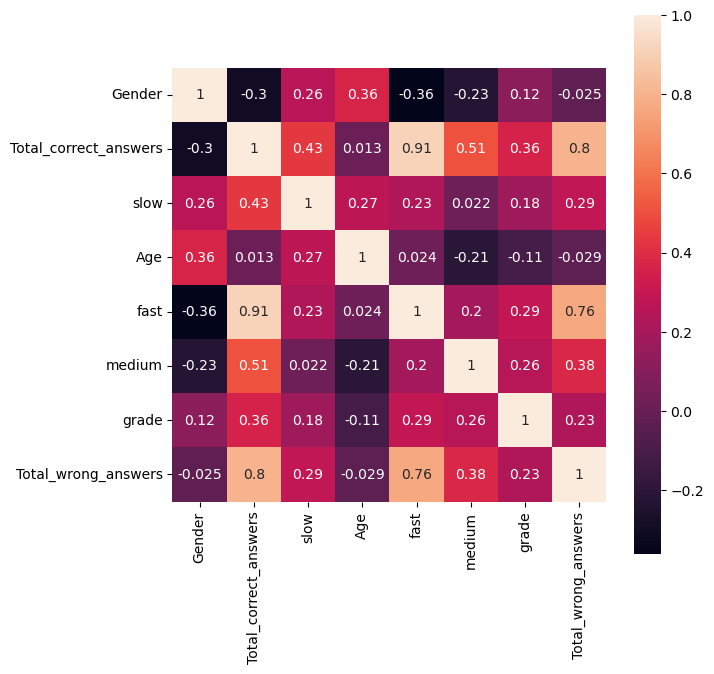

In [86]:
import seaborn as sns
#Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [74]:
x = df[['Total_correct_answers','slow','fast','medium','Total_wrong_answers']]
y = df['grade']

In [75]:
x


,Total_correct_answers,slow,fast,medium,Total_wrong_answers
0,34,12,20,2,4
1,31,5,22,4,5
2,11,4,6,1,3
3,13,5,4,4,2
4,31,3,23,5,4
5,34,6,20,8,4
6,15,6,6,3,1
7,32,8,15,9,7
8,29,4,22,3,6
9,15,2,7,6,1


In [76]:
y

0     2
1     2
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     2
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    1
Name: grade, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.4666666666666667

In [79]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.4666666666666667

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.5333333333333333

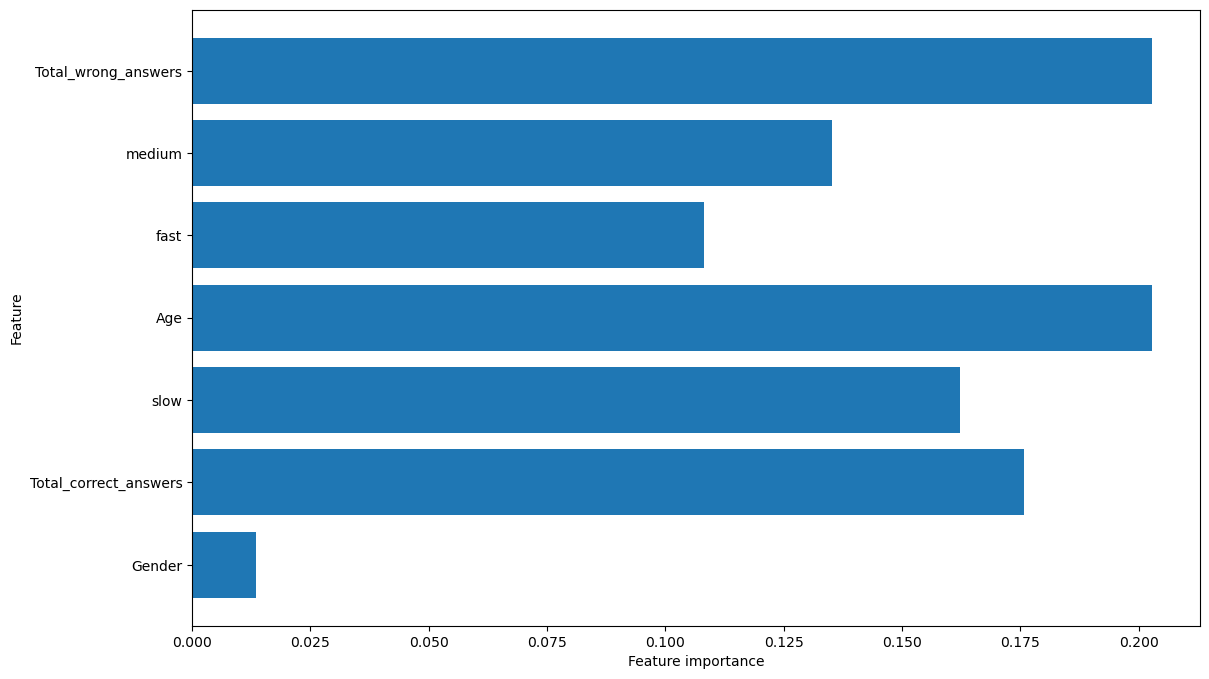

In [62]:
import matplotlib.pyplot as plt
import numpy as np
feature_names = ['Gender','Total_correct_answers','slow','Age','fast','medium','Total_wrong_answers']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [82]:
from sklearn.svm import SVC

# Initialize the model
model = SVC(decision_function_shape='ovr')  # 'ovr' for one-vs-rest

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.4666666666666667

In [83]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

accuracy_score(y_test,y_pred)

0.6666666666666666

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.4666666666666667

In [58]:
import lightgbm as lgb

# Initialize the model
model = lgb.LGBMClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 2, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there 

0.6666666666666666

In [90]:
df['grade'].value_counts()

grade
1    12
2     4
0     2
Name: count, dtype: int64